In [1280]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [1281]:
dados = pd.read_csv('creditcustomersegmentation.csv')
dados.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [1282]:
cust_id = dados['CUST_ID']

In [1283]:
colunas = dados.columns
colunas

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [1284]:
features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

In [1285]:
dados = dados[features]
dados

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


In [1286]:
missing = dados.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [1287]:
dados.fillna(dados.median(), inplace=True)
missing = dados.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

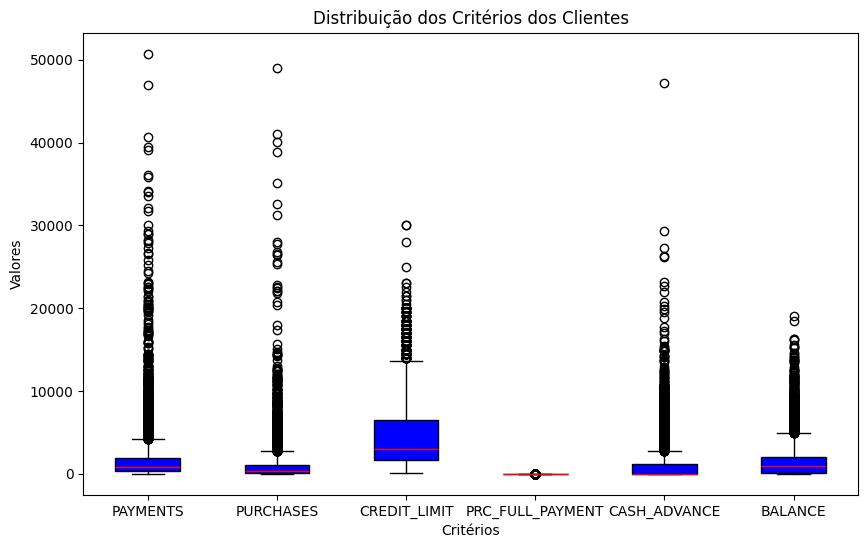

In [1288]:
# Dados para o Box Plot (usando apenas alguns critérios como exemplo)
dados_para_plot = [dados['PAYMENTS'], dados['PURCHASES'], dados['CREDIT_LIMIT'], dados['PRC_FULL_PAYMENT'], dados['CASH_ADVANCE'], dados['BALANCE']]

# Nomes dos critérios
nomes = ['PAYMENTS', 'PURCHASES', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT', 'CASH_ADVANCE', 'BALANCE']

# Criar o Box Plot
plt.figure(figsize=(10, 6))
plt.boxplot(dados_para_plot, labels=nomes, patch_artist=True)

# Adicionar título e rótulos dos eixos
plt.title('Distribuição dos Critérios dos Clientes')
plt.xlabel('Critérios')
plt.ylabel('Valores')

# Exibir o gráfico
plt.show()

Qual modelo de normalização usar? 

Função StandardScaler() --> Útil para dados que estão em diferentes escalas e possuem diferentes unidades de medida.

Função Normalizer() --> Útil para dados que possuem escalas similares, porém possuem unidades de medidas diferentes.

Nesse caso, deve utilizar o Normalizer().

In [1289]:
values = Normalizer().fit_transform(dados.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [1290]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
#Forçando o algoritmo a entregar 10x os mesmos valores
#Algoritmo itera 300x
y_pred = kmeans.fit_predict(values)
y_pred

array([0, 1, 0, ..., 0, 0, 2])

In [1291]:
y_pred = pd.DataFrame(y_pred)
dados['Cluster'] = y_pred
dados['Cluster']

0       0
1       1
2       0
3       0
4       3
       ..
8945    0
8946    0
8947    0
8948    0
8949    2
Name: Cluster, Length: 8950, dtype: int32

Etapa de validação dos clusters.

Critérios de Validação:

Compactação --> Quão próximos estão os pontos em um mesmo cluster.

Separação --> Qual bem separados os pontos de clusters diferentes estão.



Coeficiente do Silhouette 

s = (b - a)/ (max(a, b))

a --> Distância média entre um ponto específico de um cluster, em relação aos outros pontos do mesmo cluster.

b --> Distância média entro o ponto e todos os outros pontos do cluster mais próximo.






In [1292]:
#Métrica do Silhoutette
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
silhouette

0.36443927743081506

Coeficiente de Davies-Bouldin

DB = 1/K * SOMA de 1 a K (máx i!=j --> Rij)

Rij --> Medidas de similaridade entre dois clusters i e j

Rij = (Si + Sj) / dij

S --> Distância média entre cada ponto do clusters e o seu centroide.

d --> Distância entre centroides dos clusters.




In [1293]:
#Métrica Davies-Bouldin
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.075878703157104

In [1294]:
#Métrica Calinski
calinski = metrics.calinski_harabasz_score(values, labels)
calinski

3431.782548172111

In [1295]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [1296]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.32724464582661594 1.3093507662143313 3526.4668344515408


In [1297]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.3644006543416456 1.0759225251617581 3431.778237014927


In [1298]:
s3, dbs3, calinski3 = clustering_algorithm(10, values)
print(s3, dbs3, calinski3)

0.35146230674582396 1.1166977080593656 3019.196138551276


Devido o contexto do problema, deve ser escolhido 5 clusters, pois com n_clusters = 5, temos o maior número para esse indicador, que é mais relevante.

In [1299]:
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.039387005824344144 3.5378692112004373 300.02689185121955
0.3644006543416456 1.0759225251617581 3431.778237014927


In [1300]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)

print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3685724000878284 1.0566572283925253 1204.1084172648184
0.3538212950180423 1.139783250125324 1194.9347803314336
0.3669405020596727 1.0989564562726915 1167.510700870205


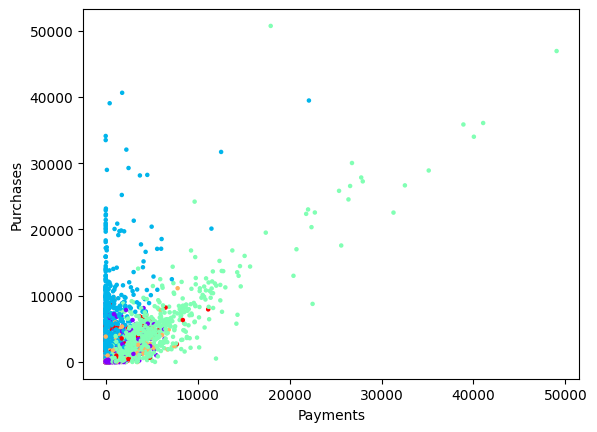

In [1301]:
plt.scatter(dados['PURCHASES'], dados['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Payments')
plt.ylabel('Purchases')
plt.show()

In [1302]:
dados.groupby('Cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
Cluster                                                             
0        3276.0   444.212219   846.809334   0.000000    23.287145   
1        1072.0  1794.024195  1982.950586   0.000000   506.925348   
2        1541.0  1140.395363  1663.836536   0.000000   209.490297   
3        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
4         412.0  1987.146873  1852.215743  70.794108  1020.146724   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
Cluster                                                                       
0          82.992153   411.833075   9630.367575            3276.0  0.774280   
1        1087.920500  2308.762488  14581.459140            1072.0  0.862131   
2         552.464447  1369.969909  19043.138560            1541.0  0.928099   
3        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
4        1338.918346  2133.415063  11670.179850             412.0  0.989512   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
Cluster  ...                                                             
0        ...       248.900782   4483.503862           3276.0  0.246293   
1        ...       884.718306  21235.065300           1072.0  0.117384   
2        ...       523.422296  18621.013310           1541.0  0.279266   
3        ...      1330.593643   8345.641905           2649.0  0.001799   
4        ...      7086.774783  76406.207520            412.0  0.019271   

                                                      
              std  min  25%       50%       75%  max  
Cluster                                               
0        0.346454  0.0  0.0  0.000000  0.444444  1.0  
1        0.186853  0.0  0.0  0.083333  0.142857  1.0  
2        0.367477  0.0  0.0  0.083333  0.545455  1.0  
3        0.023260  0.0  0.0  0.000000  0.000000  0.6  
4        0.090795  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

Agora deve-se analisar a variância dos centróides para certos atributos. 

Vamos pegar 5 clusters e um atritbuto, e vammos ver como esse valor se comporta dentro dos 5 clusters

In [1303]:
centroids = kmeans.cluster_centers_
print(centroids)

[[6.91172082e-02 2.30558192e-04 1.21221061e-01 4.79941328e-02
  7.33273099e-02 2.43612925e-02 1.72569863e-04 3.36877097e-05
  1.40000012e-04 7.93012041e-06 1.24086835e-04 2.85723913e-03
  9.43757893e-01 1.53487867e-01 5.68276323e-02 7.58208708e-05]
 [2.35141479e-01 2.16555293e-04 6.03857074e-02 3.44170171e-02
  2.59739049e-02 4.00128071e-01 5.26401668e-05 2.04882397e-05
  3.51921361e-05 6.54864556e-05 1.57199032e-03 1.12217156e-03
  5.35089146e-01 5.98040052e-01 1.04348171e-01 2.77498236e-05]
 [1.59738813e-01 2.45539530e-04 4.37899142e-01 2.56417561e-01
  1.81652647e-01 2.57868915e-02 2.04724593e-04 8.88180408e-05
  1.51100049e-04 9.36834144e-06 1.69378578e-04 6.17391999e-03
  6.04768068e-01 4.02440755e-01 8.52026617e-02 7.26174325e-05]
 [5.04289599e-01 2.72275541e-04 6.17031152e-02 3.61472866e-02
  2.55775500e-02 2.52998524e-01 6.73317111e-05 2.56982515e-05
  4.50750034e-05 5.74605324e-05 1.15731022e-03 1.33218565e-03
  7.19155598e-01 1.66164956e-01 1.79275871e-01 5.52512128e-07]
 [3.

Precisamos encontrar os atributos que mais variam entre clusters.

Para assim encontrarmos especificidades entre os cluster.

In [1304]:
#Calculando a variância em cada um dos atributos
max = len(centroids[0])
for i in range(max):
    print(dados.columns.values[i], '\n{:.4f}'.format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0226
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0542
PRC_FULL_PAYMENT 
0.0000


**Deve-se escolher para análise de cluster, as variáveis que possuem maiores variações, são elas**

*BALANCE: 0.0224*

*PURCHASE: 0.0197*

*CASH_ADVANCE: 0.02269*

*MINIMUM_PAYMENTS: 0.0546*

*CREDIT_LIMIT: 0.0360*

*PAYMENTS: 0.0279*

In [1305]:
colunas = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
description = dados.groupby('Cluster')[colunas]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
Cluster,,,,,,
0,444.212219,629.173858,141.655729,5134.705973,814.396458,3276
1,1794.024195,475.494823,3270.246792,3976.372399,4709.556601,1072
2,1140.395363,3266.466710,182.900631,4096.794388,3034.900772,1541
3,3037.962543,385.248630,1636.917210,4495.771989,968.890376,2649
4,1987.146873,858.326286,420.107194,2226.699029,1338.974045,412


In [1306]:
percent_payment = dados.groupby('Cluster')['PRC_FULL_PAYMENT'].describe()
percent_payment

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,3276.0,0.246293,0.346454,0.0,0.0,0.000000,0.444444,1.0
1,1072.0,0.117384,0.186853,0.0,0.0,0.083333,0.142857,1.0
2,1541.0,0.279266,0.367477,0.0,0.0,0.083333,0.545455,1.0
3,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6
4,412.0,0.019271,0.090795,0.0,0.0,0.000000,0.000000,1.0


# *Análise de Clusters*

*Agora, é importante que haja não só o conhecimento em Tech, mas também, o conhecimento de negócios financeiros aplicados ao Marketing. Para que assim, possa ser entendido o comportamento dos clientes do banco e o Teste A/B e estratégia de Marketing sejam aplicados*

## **Síntese:**

Com base na análise decide-se trabalhar uma estratégia de marketing em cima do Cluster 1.

Vai ser utilizado o Teste AB, onde irá ser separado dois grupos: Controle e Teste.

Controle --> Não irá ser submetido ao teste
Teste --> Será testado.

Será validado com o tempo.

Caso o resultado do objetivo seja o mesmo para os dois, talvez a estrátegia de mkt não seja tão efetiva

## **Principal Component Analysis**

In [1307]:
colunas = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT']
dados_number = dados[colunas]

In [1308]:
#Padronização

number_columns = dados_number.columns
standard = StandardScaler()
dados_number = standard.fit_transform(dados_number)
df_dados_number = pd.DataFrame(dados_number, columns=number_columns)

In [1309]:
from sklearn.decomposition import PCA
#Construindo PCA com todas as variáveis numéricas
n_fatores = df_dados_number.shape[1]
pca = PCA(n_components=n_fatores)
pca.fit(df_dados_number)
components = pca.components_
components

array([[ 0.47020785,  0.35964187,  0.40249716,  0.47999588,  0.50531189,
        -0.04268715],
       [-0.36661581,  0.5161322 , -0.36000672,  0.05452436,  0.2620589 ,
         0.63083102],
       [-0.17395875, -0.46601887,  0.61966696, -0.08035575,  0.12600353,
         0.58842475],
       [-0.26928589,  0.24227515,  0.25528266, -0.6697866 ,  0.48137423,
        -0.35111734],
       [-0.69711463, -0.18935009,  0.03553798,  0.55554951,  0.19703204,
        -0.35980259],
       [ 0.23611878, -0.54087059, -0.50790931, -0.05408005,  0.62415171,
         0.0352852 ]])

In [1310]:
explaned_variance_ratio = pca.explained_variance_ratio_
print('Autovetores:', explaned_variance_ratio)
fatores = [f'F{i+1}' for i in range(n_fatores)]

Autovetores: [0.41366978 0.24527098 0.13446519 0.11576837 0.0574413  0.03338437]


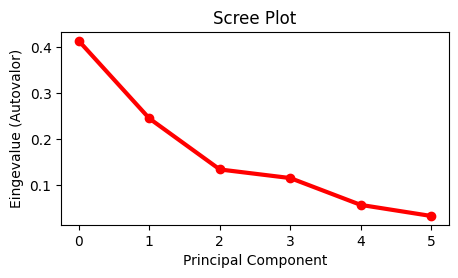

In [1311]:
fig = plt.figure(figsize= (5, 2.5))
plt.plot(explaned_variance_ratio, 'ro-', linewidth=3)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eingevalue (Autovalor)')
plt.show()

In [1312]:
df_components = pd.DataFrame(components, columns=number_columns, index = [f'Autovetor {i+1}' for i in range(n_fatores)])
df_components

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,PRC_FULL_PAYMENT
Autovetor 1,0.470208,0.359642,0.402497,0.479996,0.505312,-0.042687
Autovetor 2,-0.366616,0.516132,-0.360007,0.054524,0.262059,0.630831
Autovetor 3,-0.173959,-0.466019,0.619667,-0.080356,0.126004,0.588425
Autovetor 4,-0.269286,0.242275,0.255283,-0.669787,0.481374,-0.351117
Autovetor 5,-0.697115,-0.189350,0.035538,0.555550,0.197032,-0.359803
Autovetor 6,0.236119,-0.540871,-0.507909,-0.054080,0.624152,0.035285


Variância Acumulada: [0.41 0.66 0.79 0.91 0.97 1.  ]


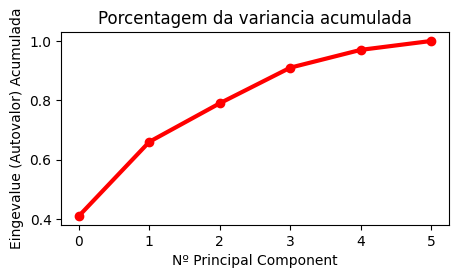

In [1313]:
variancia_acumulada = [sum(explaned_variance_ratio[0:i+1]) for i in range(n_fatores)]
variancia_acumulada = np.round(variancia_acumulada, 2)
print('Variância Acumulada:', variancia_acumulada) #Autovalores acumulados


fig = plt.figure(figsize= (5, 2.5))
plt.plot(variancia_acumulada, 'ro-', linewidth=3)
plt.title('Porcentagem da variancia acumulada')
plt.xlabel('Nº Principal Component')
plt.ylabel('Eingevalue (Autovalor) Acumulada')
plt.show()

In [1314]:
#pca.explanded_variance_ --> Representa a quantidade de variáveis por cada um dos fatores.
#O valor mais exato pode ser explicado, multplicando: pca.explaned_variance_ratio pela quantidade de fatores.
autovalores = pca.explained_variance_ratio_ * n_fatores
print('proximação da Quantidade de Variáveis por cada um dos fatores:', autovalores)
#Se realizar a soma, o segundo método é oq mais se aproxima de 5.

proximação da Quantidade de Variáveis por cada um dos fatores: [2.48201869 1.4716259  0.80679117 0.69461022 0.34464779 0.20030623]


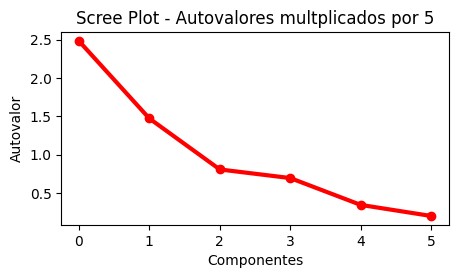

In [1315]:
fatores_selecionados = ['Fator selecionado' if autovalor > 1 else 'Fator não selecionado' for autovalor in autovalores]

fig = plt.figure(figsize= (5, 2.5))
plt.plot(autovalores, 'ro-', linewidth=3)
plt.title('Scree Plot - Autovalores multplicados por 5')
plt.xlabel('Componentes')
plt.ylabel('Autovalor')
plt.show()

In [1316]:
#Raiz dos autovalores
raiz_autovalores = np.sqrt(autovalores)
raiz_autovalores

array([1.57544238, 1.21310589, 0.89821555, 0.83343279, 0.58706711,
       0.44755584])

In [1317]:
#Cargas Fatoriais
cargas_fatoriais = pd.DataFrame(components.T * raiz_autovalores, columns=fatores, index=number_columns)
cargas_fatoriais

,F1,F2,F3,F4,F5,F6
BALANCE,0.740785,-0.444744,-0.156252,-0.224432,-0.409253,0.105676
PURCHASES,0.566595,0.626123,-0.418585,0.201920,-0.111161,-0.242070
CASH_ADVANCE,0.634111,-0.436726,0.556594,0.212761,0.020863,-0.227318
CREDIT_LIMIT,0.756206,0.066144,-0.072177,-0.558222,0.326145,-0.024204
PAYMENTS,0.796090,0.317905,0.113178,0.401193,0.115671,0.279343
PRC_FULL_PAYMENT,-0.067251,0.765265,0.528532,-0.292633,-0.211228,0.015792


C:\Users\leona\AppData\Local\Temp\ipykernel_9232\1564456526.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(lista[i], (cargas_fatoriais['F1'][i], cargas_fatoriais['F2'][i]))


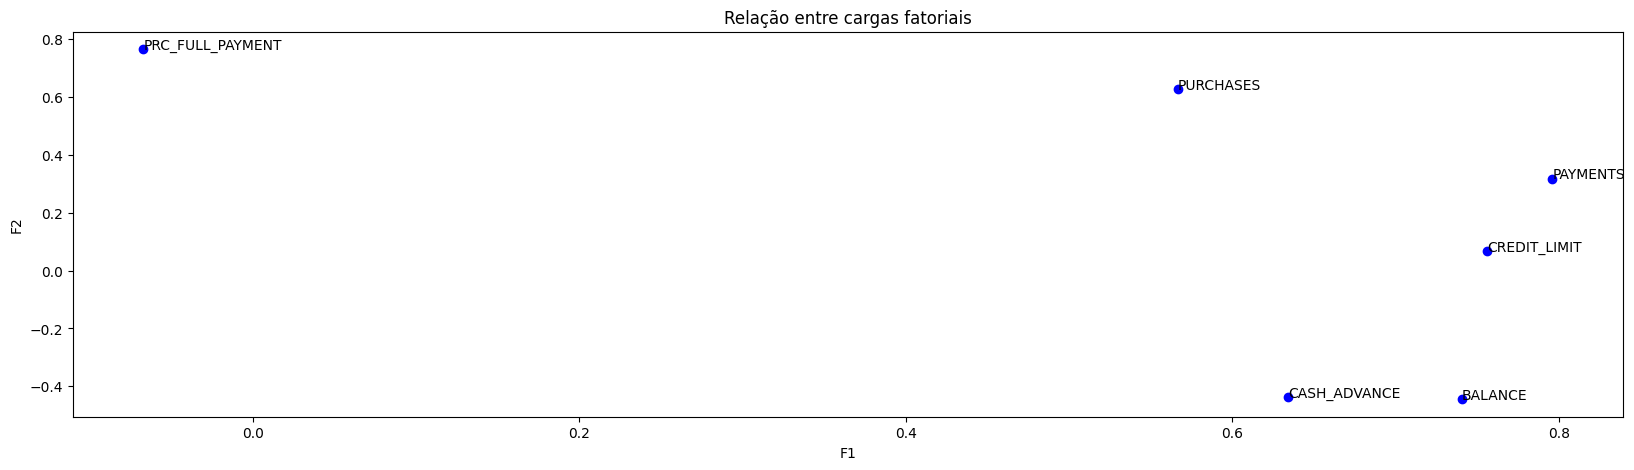

In [1318]:
lista = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT']
    
fig = plt.figure(figsize=(20, 5))
plt.scatter(x=cargas_fatoriais['F1'], y=cargas_fatoriais['F2'], )
for i in range(len(cargas_fatoriais['F1'])):
    plt.annotate(lista[i], (cargas_fatoriais['F1'][i], cargas_fatoriais['F2'][i]))
plt.title('Relação entre cargas fatoriais')
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()

## *Reduzindo a dimensionalidade no método ensinado na USP*

In [1319]:
pca = PCA(n_components=4)
pca.fit(df_dados_number)
components_reduzidas= pca.components_
components_reduzidas

array([[ 0.47020785,  0.35964187,  0.40249716,  0.47999588,  0.50531189,
        -0.04268715],
       [-0.36661581,  0.5161322 , -0.36000672,  0.05452436,  0.2620589 ,
         0.63083102],
       [-0.17395875, -0.46601887,  0.61966696, -0.08035575,  0.12600353,
         0.58842475],
       [-0.26928589,  0.24227515,  0.25528266, -0.6697866 ,  0.48137423,
        -0.35111734]])

In [1320]:
components_scores = []
for i in range(4):
    scores = pca.transform(df_dados_number)[:,i]
    components_scores.append(scores)

components_scores = pd.DataFrame(components_scores).T
print(components_scores)

             0         1         2         3
0    -1.390721 -0.305421 -0.262633  0.548151
1     1.984147 -1.069058  1.882166  0.190052
2     0.208662 -0.438523 -0.740849 -0.819189
3     0.074597 -0.208893 -0.796193 -0.708084
4    -1.119034 -0.415294 -0.293913  0.481069
...        ...       ...       ...       ...
8945 -1.411944  0.833659  0.707015 -0.007700
8946 -1.348260 -0.245465 -0.302222  0.586477
8947 -1.443953  0.237791  0.225852  0.235812
8948 -1.534464  0.188290  0.278775  0.312441
8949 -1.121226 -0.154170 -0.480928  0.573972

[8950 rows x 4 columns]


In [1321]:
dados['scorescp1'] = components_scores[0]
dados['scorescp2'] = components_scores[1]


In [1322]:
dados['Ranking'] = dados['scorescp1'] * explaned_variance_ratio[0] + dados['scorescp2'] * explaned_variance_ratio[1]
dados

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Cluster,scorescp1,scorescp2,Ranking
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,0,-1.390721,-0.305421,-0.650210
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,1,1.984147,-1.069058,0.558573
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,0,0.208662,-0.438523,-0.021240
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,0,0.074597,-0.208893,-0.020377
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,3,-1.119034,-0.415294,-0.564770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,0,-1.411944,0.833659,-0.379606
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,0,-1.348260,-0.245465,-0.617940
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,0,-1.443953,0.237791,-0.538996
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,0,-1.534464,0.188290,-0.588579


In [1323]:
dados = pd.concat([cust_id, dados], axis=1)
colunas = ['CUST_ID', 'CASH_ADVANCE', 'BALANCE', 'PAYMENTS', 'PRC_FULL_PAYMENT', 'PURCHASES', 'CREDIT_LIMIT', 'Cluster','Ranking']
dados = dados[colunas]

In [1324]:
dados = dados.sort_values(by='Ranking', ascending=False)
dados_50 = dados.head(50)
dados_50

,CUST_ID,CASH_ADVANCE,BALANCE,PAYMENTS,PRC_FULL_PAYMENT,PURCHASES,CREDIT_LIMIT,Cluster,Ranking
550,C10574,558.166886,11547.520010,46930.598240,0.250000,49039.57,22500.0,2,12.038149
501,C10523,0.000000,13479.288210,36066.750680,0.083333,41050.40,17000.0,2,9.660593
1256,C11300,0.000000,4010.621974,33994.727850,1.000000,40040.71,18000.0,2,9.346867
1604,C11657,0.000000,3391.702180,35843.625930,1.000000,38902.71,18000.0,2,9.343650
7046,C17237,0.000000,2980.054695,30029.014960,0.750000,26784.62,30000.0,2,7.793986
3937,C14048,0.000000,2997.977825,28896.665220,0.750000,35131.16,12000.0,2,7.715258
4220,C14338,0.000000,1268.809031,50721.483360,0.000000,17945.00,18000.0,2,7.471825
5358,C15510,19513.474830,6372.182817,39461.965800,0.250000,22101.78,7500.0,1,7.434239
970,C11004,0.000000,3108.393701,26557.097240,0.875000,26582.34,28000.0,2,7.388663
273,C10284,0.000000,5131.319584,26652.344320,0.083333,32539.78,11500.0,2,6.935037


In [1325]:
hail = dados.sort_values(by='Ranking', ascending=True)
hail.head(50)

,CUST_ID,CASH_ADVANCE,BALANCE,PAYMENTS,PRC_FULL_PAYMENT,PURCHASES,CREDIT_LIMIT,Cluster,Ranking
3772,C13879,134.752225,72.723403,94.494445,0.0,0.00,200.0,3,-0.712611
8483,C18713,38.606307,2.433343,0.000000,0.0,0.00,500.0,0,-0.711176
8755,C18994,81.569379,3.036243,0.000000,0.0,0.00,500.0,0,-0.709543
8854,C19095,0.000000,3.833185,0.000000,0.0,45.00,500.0,0,-0.706745
8899,C19140,38.627907,4.817213,51.013461,0.0,0.00,500.0,0,-0.706239
8137,C18357,136.755929,31.997904,0.000000,0.0,0.00,500.0,0,-0.706030
6725,C16913,0.000000,2.611795,143.823981,0.0,43.08,300.0,0,-0.705125
8943,C19184,0.000000,5.871712,58.644883,0.0,20.90,500.0,0,-0.704212
8607,C18841,19.351230,4.390888,95.983734,0.0,0.00,500.0,0,-0.702733
6384,C16559,19.464101,287.787967,104.919187,0.0,0.00,300.0,4,-0.699295


In [1326]:
cluster3 = dados[
    dados['Cluster'] == 3
]
print(cluster3['Ranking'].mean())

cluster2 = dados[
    dados['Cluster'] == 2
]
print("Média de Ranking Cluster 2:", cluster2['Ranking'].mean())

cluster4 = dados[
    dados['Cluster'] == 4
]
print(cluster4['Ranking'].mean())

cluster1 = dados[
    dados['Cluster'] == 1
]
print("Média de Ranking Cluster 1:", cluster1['Ranking'].mean())

cluster0 = dados[
    dados['Cluster'] == 0
]
print(cluster0['Ranking'].mean())

-0.12432225173343042
Média de Ranking Cluster 2: 0.39929139050442414
-0.25057109370170144
Média de Ranking Cluster 1: 0.26277939223498414
-0.14177124719055637


## **Elementos necessários para a análise**

## *Quadro 1: Cluster e Variáveis principais*

In [1327]:
description

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
Cluster,,,,,,
0,444.212219,629.173858,141.655729,5134.705973,814.396458,3276
1,1794.024195,475.494823,3270.246792,3976.372399,4709.556601,1072
2,1140.395363,3266.466710,182.900631,4096.794388,3034.900772,1541
3,3037.962543,385.248630,1636.917210,4495.771989,968.890376,2649
4,1987.146873,858.326286,420.107194,2226.699029,1338.974045,412


*O cluster 3 tem a média de Limite de crédito 3,05% maior que o cluster 4. Este (cluster 4) por sua vez tem a média de pagamento acumulado 34,32% maior que o cluster 3.*

*Já o saldo do cluster 4 é 57,06% maior que o do cluster 3.*

## *Quadro 2: Percentual de quitação por Cluster*

In [1328]:
percent_payment

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,3276.0,0.246293,0.346454,0.0,0.0,0.000000,0.444444,1.0
1,1072.0,0.117384,0.186853,0.0,0.0,0.083333,0.142857,1.0
2,1541.0,0.279266,0.367477,0.0,0.0,0.083333,0.545455,1.0
3,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6
4,412.0,0.019271,0.090795,0.0,0.0,0.000000,0.000000,1.0


*Já o percentual médio total de pagamento do cluster 3 é 137,36% maior que o do cluster 4, cerca de 16,12pp (Pontos Percentuais)*

## *Relação Cargas fatoriais com as variáveis principais*

C:\Users\leona\AppData\Local\Temp\ipykernel_9232\884569612.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(lista[i], (cargas_fatoriais['F1'][i], cargas_fatoriais['F2'][i]))


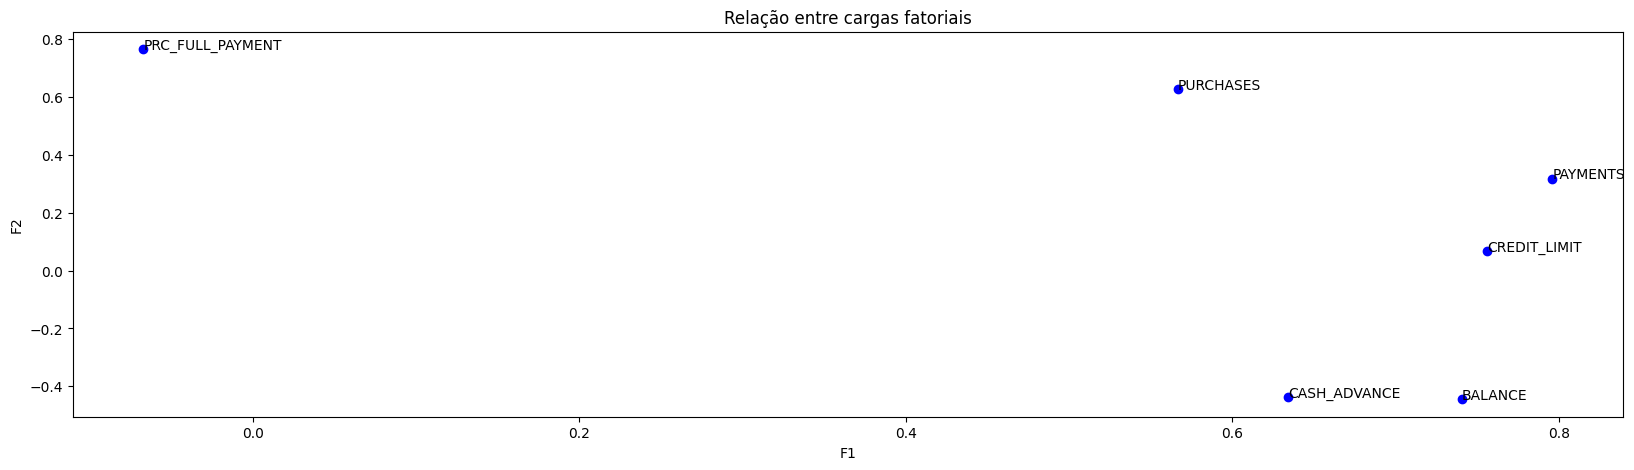

In [1329]:
fig = plt.figure(figsize=(20, 5))
plt.scatter(x=cargas_fatoriais['F1'], y=cargas_fatoriais['F2'], )
for i in range(len(cargas_fatoriais['F1'])):
    plt.annotate(lista[i], (cargas_fatoriais['F1'][i], cargas_fatoriais['F2'][i]))
plt.title('Relação entre cargas fatoriais')
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()

In [1330]:
cargas_fatoriais[['F1', 'F2']]

,F1,F2
BALANCE,0.740785,-0.444744
PURCHASES,0.566595,0.626123
CASH_ADVANCE,0.634111,-0.436726
CREDIT_LIMIT,0.756206,0.066144
PAYMENTS,0.796090,0.317905
PRC_FULL_PAYMENT,-0.067251,0.765265


In [1331]:
carga_resultante = cargas_fatoriais['F1'] + cargas_fatoriais['F2']
carga_resultante

BALANCE             0.296042
PURCHASES           1.192718
CASH_ADVANCE        0.197385
CREDIT_LIMIT        0.822350
PAYMENTS            1.113995
PRC_FULL_PAYMENT    0.698014
dtype: float64

## *Top 50 clientes com base no rankeamento de PCA*

In [1332]:
dados_50

,CUST_ID,CASH_ADVANCE,BALANCE,PAYMENTS,PRC_FULL_PAYMENT,PURCHASES,CREDIT_LIMIT,Cluster,Ranking
550,C10574,558.166886,11547.520010,46930.598240,0.250000,49039.57,22500.0,2,12.038149
501,C10523,0.000000,13479.288210,36066.750680,0.083333,41050.40,17000.0,2,9.660593
1256,C11300,0.000000,4010.621974,33994.727850,1.000000,40040.71,18000.0,2,9.346867
1604,C11657,0.000000,3391.702180,35843.625930,1.000000,38902.71,18000.0,2,9.343650
7046,C17237,0.000000,2980.054695,30029.014960,0.750000,26784.62,30000.0,2,7.793986
3937,C14048,0.000000,2997.977825,28896.665220,0.750000,35131.16,12000.0,2,7.715258
4220,C14338,0.000000,1268.809031,50721.483360,0.000000,17945.00,18000.0,2,7.471825
5358,C15510,19513.474830,6372.182817,39461.965800,0.250000,22101.78,7500.0,1,7.434239
970,C11004,0.000000,3108.393701,26557.097240,0.875000,26582.34,28000.0,2,7.388663
273,C10284,0.000000,5131.319584,26652.344320,0.083333,32539.78,11500.0,2,6.935037


*Quando vamos olhar o top 50 vemos que é bem alternado distribuído entre os dois cluster. Mais ainda sim, o cluster 1 leva uma certa vantagem em relação ao cluster 2. Porém, o que explica isso?*

*Ao analisar as cargas fatoriais de cada fator, podemos ver que comparando o fator 1 com o fator 2, encontramos uma forte relação do fator 1 com quatro variáveis importantes na clusterização, sendo elas:*

*PCR_FULL_PAYMENTS* *,* *PAYMENTS* *,* *CREDIT_LIMIT* *e* *BALANCE.*

*Quando vamos calcular o ranking, com base nos scores e nos autovalores, levamos em consideração as variáveis que são relevantes nos fatores 1 e 2. Com isso, podemos observar que apesar de ter desvantagens significativas em Payments e balance (variáveis que possuem forte relação com o fator 1) em relação ao cluster 4. Porém, o cluster 3 obteve uma vantagem bem relevante no prc_full_payments, onde há uma vantagem significativa para o fator 2, aliada com a vantagem na variável credit_limit*

*O queremos dizer? que o Ranking que está sendo calculado está levando em consideração todas as vantagens e desvantagens, com isso o fator 2 pode ter perpetuado a vantagem do cluster 3 em relação ao cluster 4, com base no prc_full_payment de 137,32% em relação ao cluster 4*

In [1333]:
dados_50['Cluster'].value_counts()

Cluster
2    34
1    15
3     1
Name: count, dtype: int64

In [1343]:
maximoc2 = dados[
    dados['Cluster'] == 2
]
print('Máximo Cluster 2:', maximoc2['Ranking'].max())
print('Mínimo Cluster 2:',maximoc2['Ranking'].min())
print('Desvio Padrão Cluster 2: ', maximoc2['Ranking'].std())

Máximo Cluster 2: 7.434238771470148
Mínimo Cluster 2: -0.6972588319730145
Desvio Padrão Cluster 2:  0.9148730698333507


In [1345]:
maximoc1 = dados[
    dados['Cluster'] == 1
]
print('Máximo Cluster 1:', maximoc1['Ranking'].max())
print('Mínimo Cluster 1:',maximoc1['Ranking'].min())
print('Desvio Padrão Cluster 1: ', maximoc1['Ranking'].std())

Máximo Cluster 1: 7.434238771470148
Mínimo Cluster 1: -0.6972588319730145
Desvio Padrão Cluster 1:  0.9148730698333507


In [1346]:
cluster12 = dados[
    (dados['Cluster'] == 1) | (dados['Cluster'] == 2)
]

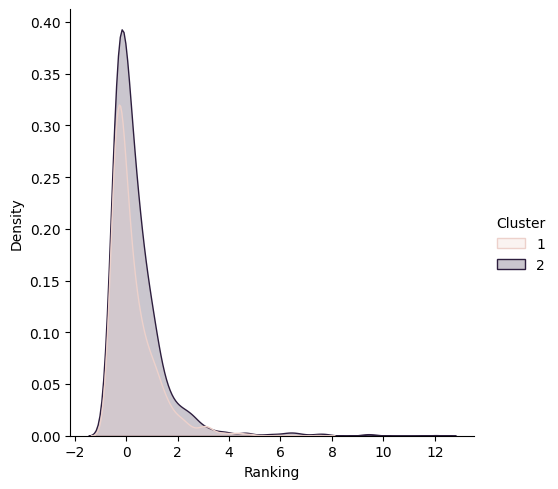

In [1347]:
import seaborn as sns
color_dict = {1: 'Blue', 2: 'Red'}
sns.set_palette(list(color_dict.values())) #Padronizando como paleta de cores


sns.displot(data=cluster12, x='Ranking', hue='Cluster', kind='kde', fill=True)
plt.show() #Distribuição normal dos alunos em relação a sua situação.